In [24]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
data = pd.read_csv("data/u.data", names=["user.id", "movie.id", "rate", "date"], sep='\t')
data_item = pd.read_csv("data/u.item", names=["id", "title", "release.date", "video.release.date", "unknown", "Action", "Adventure", "Animation", "Children.s", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film.Noir", "Horror", "Musical", "Mystery", "Romance", "Sci.Fi", "Thriller", "War", "Western"], sep='|', encoding='latin1')
data_user = pd.read_csv("data/u.user",names=["age", "sexe", "Metier", "code_postal"], sep='|')  



In [ ]:
data_user.head()

,age,sexe,Metier,code_postal
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


In [5]:
data_item.head()

,id,title,release.date,video.release.date,unknown,Action,Adventure,Animation,Children.s,Comedy,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
data.head()

,user.id,movie.id,rate,date
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Analyse de la base data

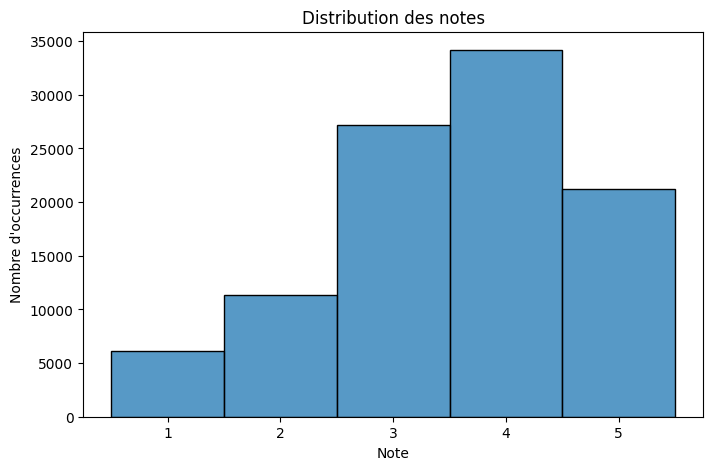

In [ ]:
# Distribution des notes
plt.figure(figsize=(8, 5))
sns.histplot(data['rate'], bins=range(1, 7),  discrete=True)
plt.xlabel("Note")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des notes")
plt.show()


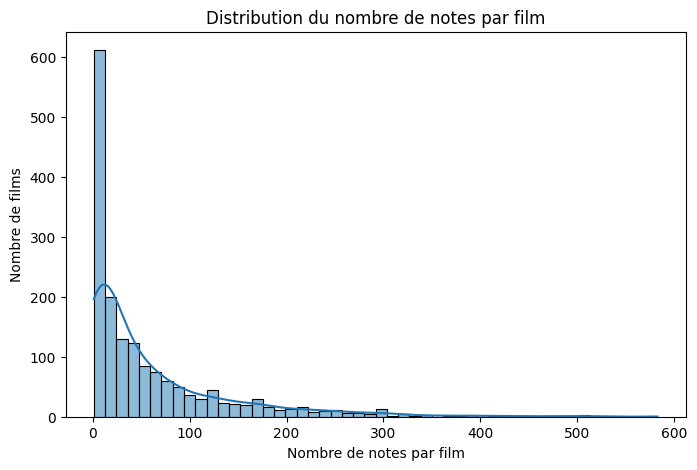

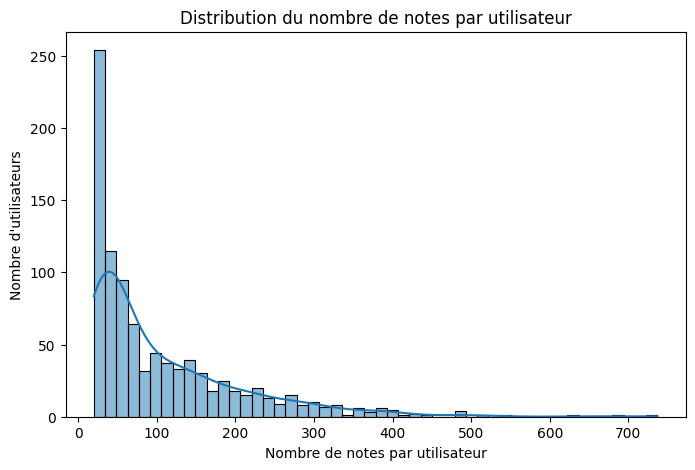

In [16]:
# Nombre de notes par film
notes_par_film = data.groupby('movie.id')['rate'].count()

plt.figure(figsize=(8, 5))
sns.histplot(notes_par_film, bins=50, kde=True)
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film")
plt.show()

# Nombre de notes par utilisateur
notes_par_utilisateur = data.groupby('user.id')['rate'].count()

plt.figure(figsize=(8, 5))
sns.histplot(notes_par_utilisateur, bins=50, kde=True)
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur")
plt.show()


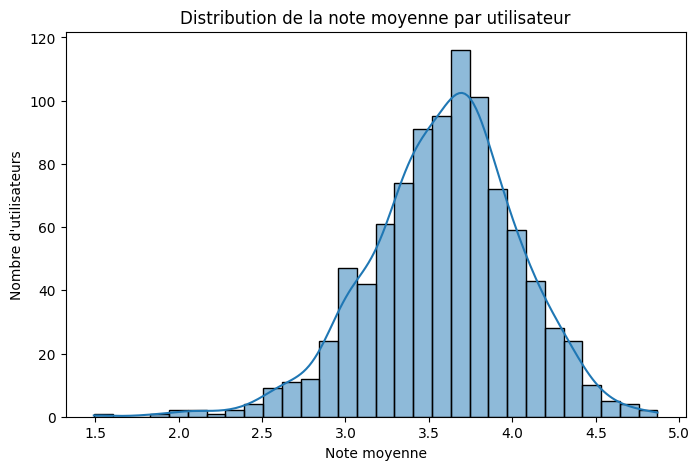

In [17]:
# Moyenne des notes par utilisateur
moyenne_notes_par_utilisateur = data.groupby('user.id')['rate'].mean()

plt.figure(figsize=(8, 5))
sns.histplot(moyenne_notes_par_utilisateur, bins=30, kde=True)
plt.xlabel("Note moyenne")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution de la note moyenne par utilisateur")
plt.show()


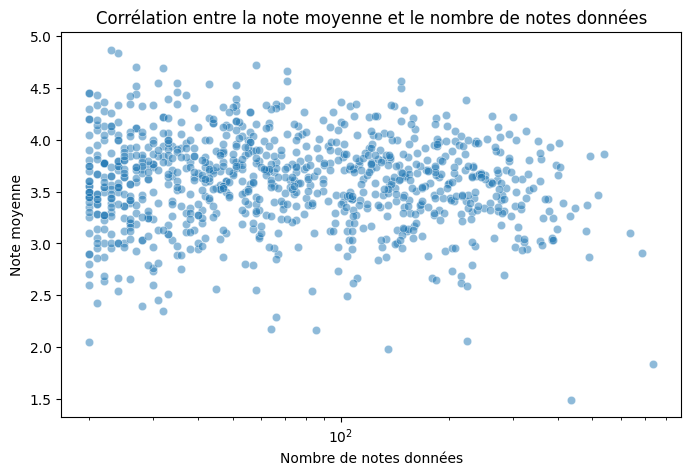

Corrélation : -0.14


In [18]:
import numpy as np

# Création d'un DataFrame pour la corrélation
user_stats = data.groupby('user.id')['rate'].agg(['mean', 'count'])

plt.figure(figsize=(8, 5))
sns.scatterplot(x=user_stats['count'], y=user_stats['mean'], alpha=0.5)
plt.xscale('log')  # Échelle logarithmique pour mieux visualiser
plt.xlabel("Nombre de notes données")
plt.ylabel("Note moyenne")
plt.title("Corrélation entre la note moyenne et le nombre de notes données")
plt.show()

# Calcul du coefficient de corrélation
correlation = np.corrcoef(user_stats['count'], user_stats['mean'])[0, 1]
print(f"Corrélation : {correlation:.2f}")


# Analyse de la base user

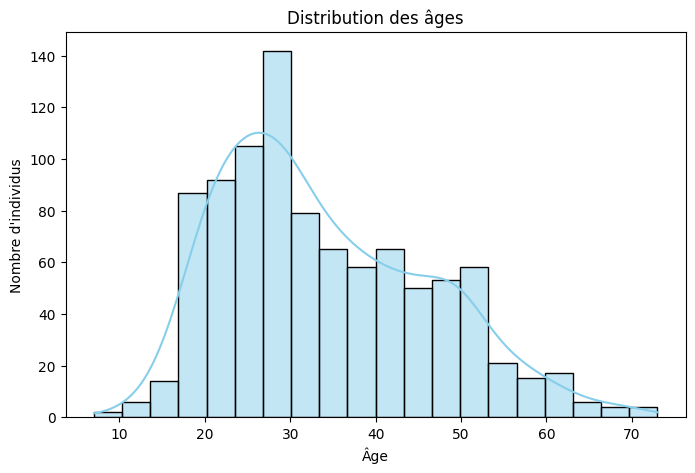

In [25]:
# Distribution des âges
plt.figure(figsize=(8, 5))
sns.histplot(data_user["age"], bins=20, kde=True, color="skyblue")
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.title("Distribution des âges")
plt.show()

C:\Users\SobjioLagnol(Externa\AppData\Local\Temp\ipykernel_24684\1137471947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sexe", data=data_user, palette="pastel")


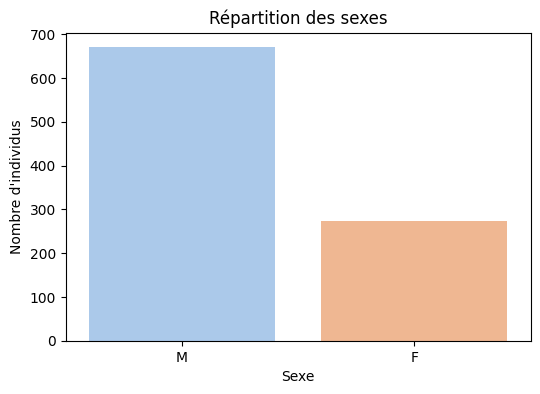

In [26]:
# Répartition des sexes
plt.figure(figsize=(6, 4))
sns.countplot(x="sexe", data=data_user, palette="pastel")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'individus")
plt.title("Répartition des sexes")
plt.show()

C:\Users\SobjioLagnol(Externa\AppData\Local\Temp\ipykernel_24684\3984040559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_metiers.values, y=top_metiers.index, palette="muted")


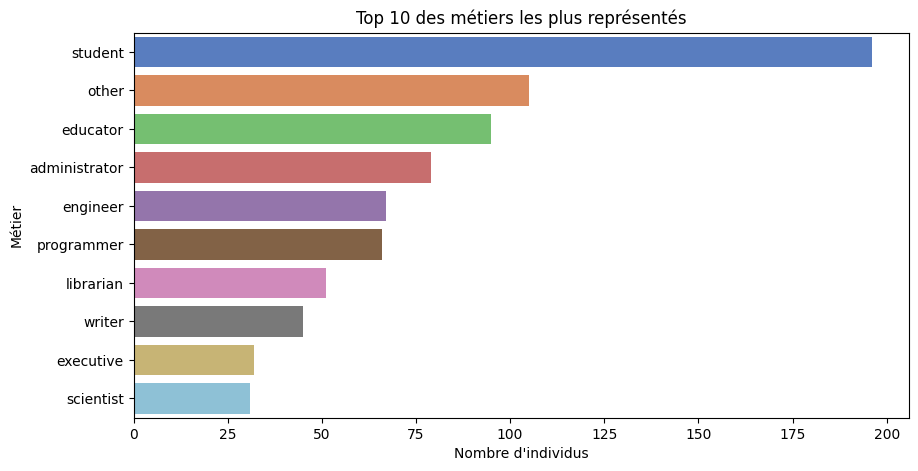

In [27]:
# Répartition des métiers
plt.figure(figsize=(10, 5))
top_metiers = data_user["Metier"].value_counts().nlargest(10)  # Top 10 métiers
sns.barplot(x=top_metiers.values, y=top_metiers.index, palette="muted")
plt.xlabel("Nombre d'individus")
plt.ylabel("Métier")
plt.title("Top 10 des métiers les plus représentés")
plt.show()

C:\Users\SobjioLagnol(Externa\AppData\Local\Temp\ipykernel_24684\1894486255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes.values, y=top_codes.index, palette="coolwarm")


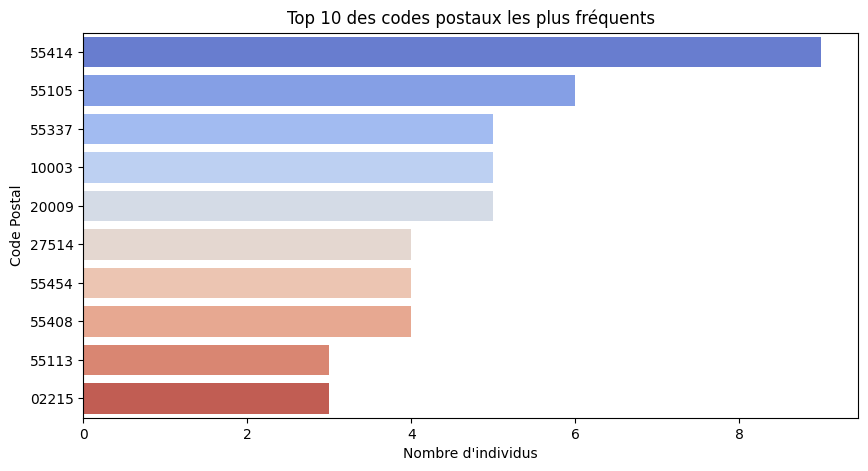

In [28]:
# Analyse des codes postaux (Top 10)
plt.figure(figsize=(10, 5))
top_codes = data_user["code_postal"].value_counts().nlargest(10)
sns.barplot(x=top_codes.values, y=top_codes.index, palette="coolwarm")
plt.xlabel("Nombre d'individus")
plt.ylabel("Code Postal")
plt.title("Top 10 des codes postaux les plus fréquents")
plt.show()

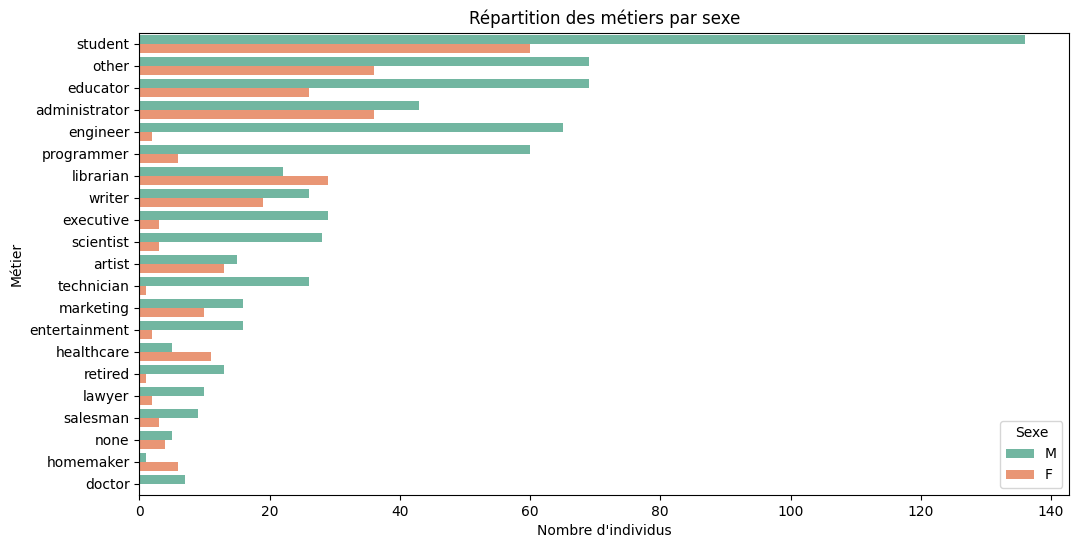

In [29]:
# Croisement entre Sexe et Métier
plt.figure(figsize=(12, 6))
sns.countplot(y="Metier", hue="sexe", data=data_user, order=data_user["Metier"].value_counts().index, palette="Set2")
plt.xlabel("Nombre d'individus")
plt.ylabel("Métier")
plt.title("Répartition des métiers par sexe")
plt.legend(title="Sexe")
plt.show()
